In [24]:
# -------------------------- PARCIAL FINAL MÉTODOS COMPUTACIONALES 1 --------------------------

import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import numpy as np
from itertools import combinations
from itertools import combinations_with_replacement
from itertools import permutations

In [25]:
# ------------------------------------------ PUNTO A ------------------------------------------

# Estados y Priors
estados = np.array([0, 1]) 
dato_Prior =  np.array([0.2, 0.8])

# Matrices de transmisión y emisión
T = np.array([[0.8, 0.2],[0.2, 0.8]])
E = np.array([[0.5, 0.9],[0.5, 0.1]])

DictH = {0:'Justa', 1:'Sesgada'}
print(DictH[0])
DictO = {0:'Cara', 1:'Sello'}
print(DictO[1])
observ = np.array([1,0,0,0,1,0,1,0])
print(observ)

Justa
Sello
[1 0 0 0 1 0 1 0]


In [26]:
# Hidden States
def GetHiddenStates(estados, N):
    
    CStates = list( combinations_with_replacement(estados,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    return np.array(Permu)

In [28]:
HiddenStates = GetHiddenStates(estados,8)
print(HiddenStates)
len(HiddenStates)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]


256

In [29]:
# Probabilidad
def GetProb(T, E, observ, estado, Prior):
    
    n = len(observ)
    p = 1.
    p *= Prior[estado[0]]
    
    for i in range(n-1):
        p *= T[ estado[i+1], estado[i] ]
    
    for i in range(n):
        p *= E[ observ[i], estado[i] ]
    
    return p

In [30]:
dim = HiddenStates.shape[0]
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T, E, observ, HiddenStates[i], dato_Prior)
print(dim)
print(P)

256
[1.63840000e-04 7.37280000e-05 2.04800000e-06 1.84320000e-05
 2.04800000e-06 1.84320000e-05 1.84320000e-05 1.84320000e-05
 3.27680000e-05 1.47456000e-05 8.29440000e-06 3.68640000e-06
 9.21600000e-07 2.56000000e-08 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 2.30400000e-07 3.31776000e-05
 8.29440000e-06 2.30400000e-07 2.07360000e-06 2.30400000e-07
 2.07360000e-06 3.31776000e-05 1.47456000e-05 4.09600000e-07
 3.68640000e-06 4.09600000e-07 3.68640000e-06 3.68640000e-06
 5.89824000e-05 2.65420800e-05 1.84320000e-07 1.65888000e-06
 7.37280000e-07 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.65888000e-06 4.60800000e-08 6.63552000e-06 1.65888000e-06
 9.33120000e-07 4.14720000e-07 1.03680000e-07 2.88000000e-09
 4.14720000e-07 1.49299200e-05 4.14720000e-07 3.73248000e-06
 6.63552000e-06 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.03680000e-07 2.88000000e-09 4.14720000e-07 9.33120000e-07
 2.59200000e-08 2.33

In [31]:
# ------------------------------------------ PUNTO B ------------------------------------------

# Hidden State con mayor probabilidad
Pobserv = np.sum(P)
print(Pobserv)
maxP = np.max(P)
ii = np.where(P == np.amax(P))
print(HiddenStates[ii], maxP)

0.0019344381513984013
[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


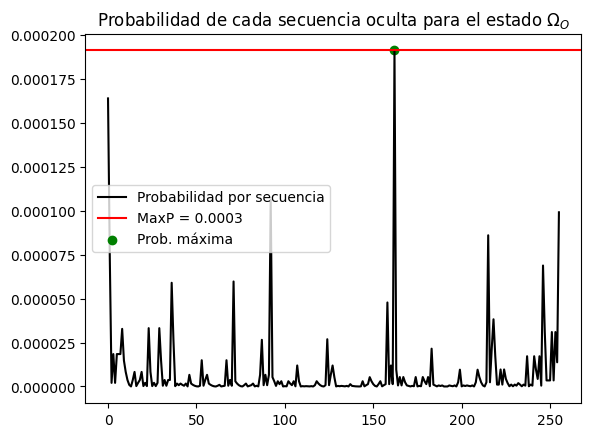

In [32]:
# Gráfica
plt.plot(P, color = 'k', label = 'Probabilidad por secuencia')
plt.axhline(y = maxP, c = 'r', label = 'MaxP = 0.0003')
plt.legend(loc = 'upper left')
plt.grid()

dom = np.linspace(0,255,256)

plt.scatter(ii, maxP, c = "g", label = "Prob. máxima")
plt.title("Probabilidad de cada secuencia oculta para el estado $\Omega_O $")
plt.grid()
plt.legend()

In [33]:
EstadosObserv = GetHiddenStates([0, 1], 8)
print(EstadosObserv)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]]


In [34]:
NObs = EstadosObserv.shape[0]
PObs = np.zeros(NObs)


for j in range(NObs):
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T, E, EstadosObserv[j], HiddenStates[i], dato_Prior)    
    PObs[j] = np.sum(P)


[[0 0 0 0 0 0 0 0]] 0.13698241367042568


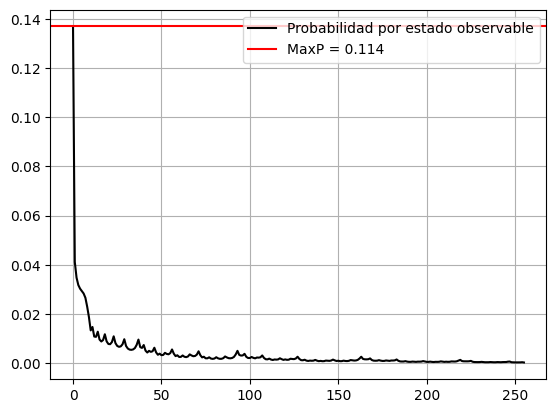

In [35]:
# ------------------------------------------ PUNTO C ------------------------------------------

# Probabilidades de cada estado observable
maxP_ = np.max(PObs)
ii = np.where( PObs == np.amax(PObs))
print(EstadosObserv[ii], maxP_)

# Gráfica
plt.plot(PObs, label = 'Probabilidad por estado observable', c = 'k')
plt.axhline(y = maxP_, c = 'r', label = 'MaxP = 0.114')
plt.legend(loc = 'upper right')
plt.grid()

In [36]:
# ------------------------------------------ PUNTO D ------------------------------------------

# Estados obserbados sumados

np.sum(PObs)
print(np.sum(PObs))

1.0000000000000007


In [37]:
# ------------------------------------------ PUNTO E ------------------------------------------

# ¿Depende el resultado de la probabilidad a priori?

# El resultado sí depende de la probabilidad a priori. Es visible en el código construído que la probabilidad a priori
# es un dato bastante valioso para lograr encontrar una secuencia oculta que sea la más probable y para poder calcular
# las probabilidades de esta y de los estados observables del experimento. Si los datos de la probabilidad a priori 
# fueran cambiados, se puede observar que hay una diferencia en la secuencia oculta más probable, en su probabilidad,
# y las probabilidades para los estados observables. Son importantes los cambios que se ven en la secuencia oculta más
# probable y su probabilidad. Los cambios en las probabilidades de los estados observables son mucho más pequeños o
# menos notables, sin embargo, la diferencia en estos es considerable. 

